In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats.mstats import winsorize
from scipy.stats import stats
from scipy.stats import zscore
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="whitegrid")
title_font= {"family": "arial", "weight": "bold", "color": "darkred", "size": 13}
label_font= {"family": "arial", "weight": "bold", "color": "darkblue", "size": 10}


#### Viewing data

In [2]:
df= pd.read_csv("suicide.csv")
df.head() # We only display the first five lines

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [4]:
df.columns = ['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k_rate', 'country-year', 'HDI_for_year',
       'gdp_for_year', 'gdp_per_capita', 'generation']
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k_rate', 'country-year', 'HDI_for_year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [5]:
pd.options.display.float_format= "{:.6f}".format
df.describe()

,year,suicides_no,population,suicides/100k_rate,HDI_for_year,gdp_per_capita
count,27820.000000,27820.000000,27820.000000,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1844793.617398,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3911779.441756,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,278.000000,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,97498.500000,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,430150.000000,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1486143.250000,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,43805214.000000,224.970000,0.944000,126352.000000


In [6]:
df.isnull().sum()*100/df.shape[0]

country               0.000000
year                  0.000000
sex                   0.000000
age                   0.000000
suicides_no           0.000000
population            0.000000
suicides/100k_rate    0.000000
country-year          0.000000
HDI_for_year         69.935298
gdp_for_year          0.000000
gdp_per_capita        0.000000
generation            0.000000
dtype: float64

There are not incorrect value appears. But remember, gdp_for_year must be continuos. Let's try to make continuos gdp_for_year


In [10]:
df["gdp_for_year"] = df["gdp_for_year"].replace(",", "", regex=True)
df["gdp_for_year"]= df["gdp_for_year"].astype("int64")

0         2156624900
1         2156624900
2         2156624900
3         2156624900
4         2156624900
            ...     
27815    63067077179
27816    63067077179
27817    63067077179
27818    63067077179
27819    63067077179
Name: gdp_for_year, Length: 27820, dtype: object

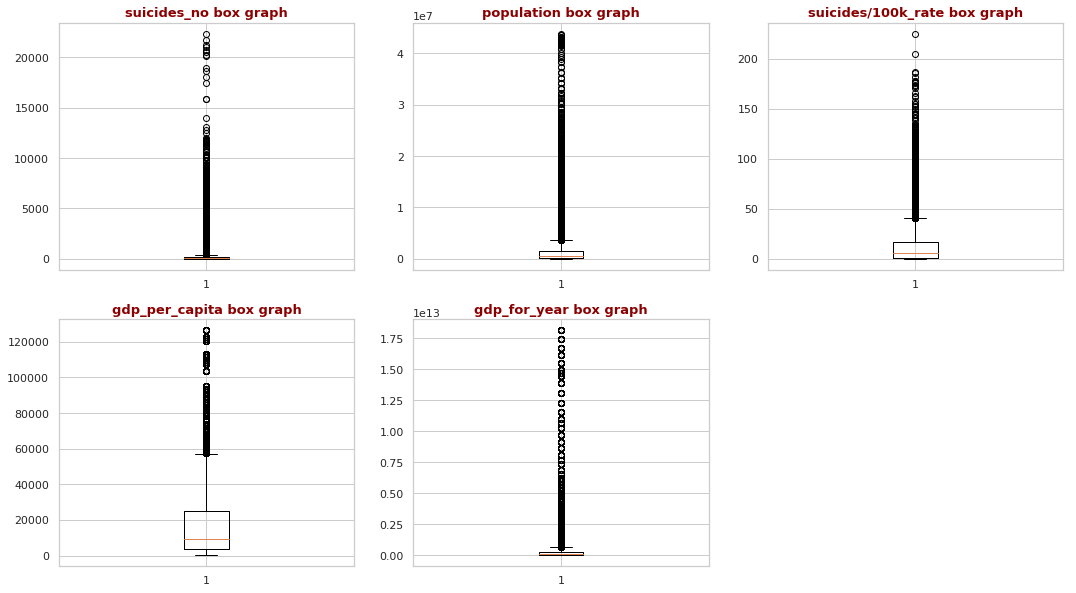

In [14]:
plt.figure(figsize=(18,10))
columns_name = ["suicides_no", "population","suicides/100k_rate", "gdp_per_capita", "gdp_for_year" ]
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.boxplot(df[columns_name[i]])
    plt.title("{} box graph".format(columns_name[i]), fontdict= title_font)
    

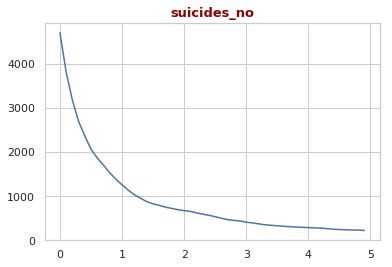

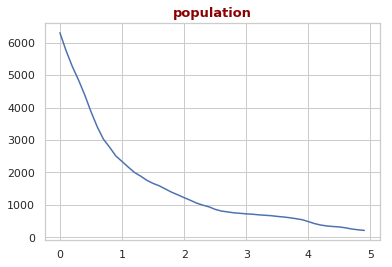

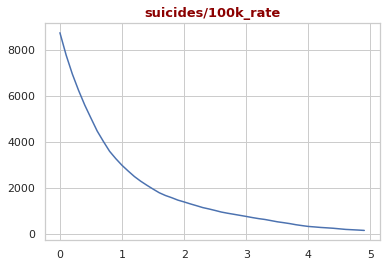

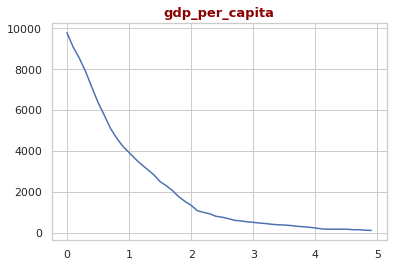

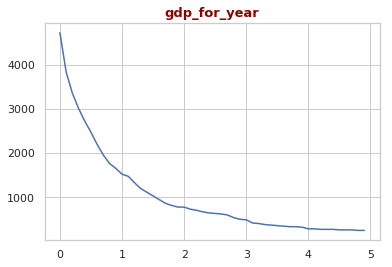

In [16]:
columns_name = ["suicides_no", "population","suicides/100k_rate", "gdp_per_capita", "gdp_for_year" ]
for names in range(0,5): 
    zscorelist = []
    zscores = zscore(df[columns_name[names]])
    for thereshold in np.arange(0,5,0.1):
        zscorelist.append((thereshold,len(np.where(zscores>thereshold)[0]))) 
        df_outliers= pd.DataFrame(zscorelist, columns=["thereshold", "outliers"])
    plt.plot(df_outliers.thereshold, df_outliers.outliers)
    plt.title(columns_name[names], fontdict=title_font)
    plt.show()
    

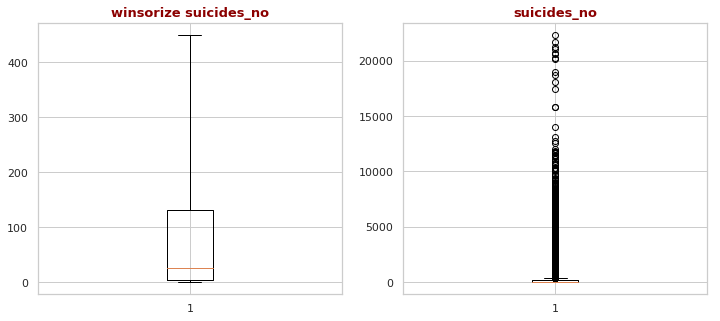

In [18]:
df["winsorize_suicides_no"] = winsorize(df["suicides_no"], (0, 0.11))
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.boxplot(df["winsorize_suicides_no"], whis=2.5)
plt.title("winsorize suicides_no", fontdict=title_font)

plt.subplot(122)
plt.boxplot(df["suicides_no"])
plt.title("suicides_no", fontdict=title_font)
plt.show()

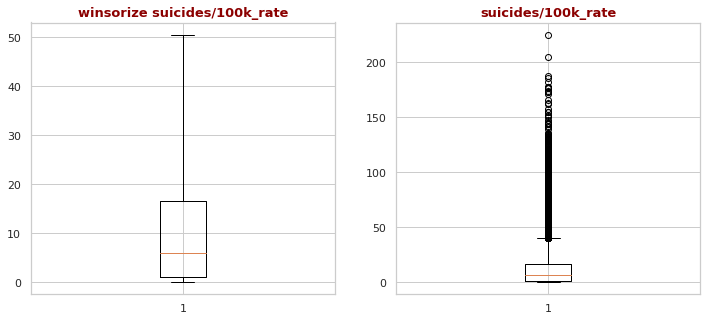

In [19]:
df["winsorize_suicides/100k_rate"] = winsorize(df["suicides/100k_rate"], (0,0.05))
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.boxplot(df["winsorize_suicides/100k_rate"], whis=2.5)
plt.title("winsorize suicides/100k_rate", fontdict=title_font)

plt.subplot(122)
plt.boxplot(df["suicides/100k_rate"])
plt.title("suicides/100k_rate", fontdict=title_font)
plt.show()

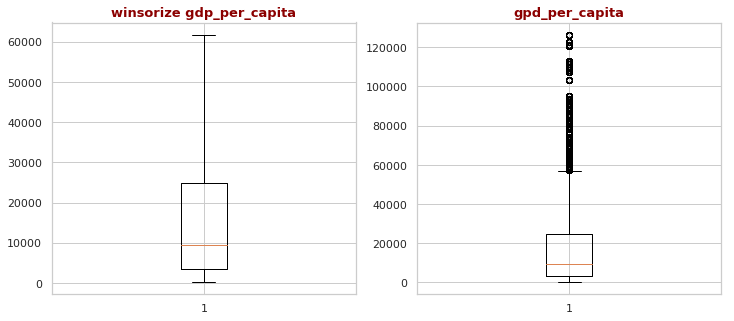

In [20]:
df["winsorize_gdp_per_capita"] = winsorize(df["gdp_per_capita"], (0, 0.03))
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.boxplot(df["winsorize_gdp_per_capita"], whis=2.0)
plt.title("winsorize gdp_per_capita", fontdict=title_font)

plt.subplot(122)
plt.boxplot(df["gdp_per_capita"])
plt.title("gpd_per_capita", fontdict=title_font)
plt.show()

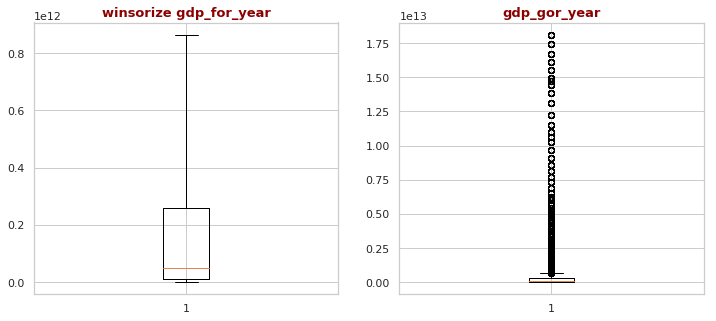

In [21]:
df["winsorize_gdp_for_year"] = winsorize(df["gdp_for_year"], (0, 0.11))
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.boxplot(df["winsorize_gdp_for_year"], whis=2.5)
plt.title("winsorize gdp_for_year", fontdict=title_font)

plt.subplot(122)
plt.boxplot(df["gdp_for_year"])
plt.title("gdp_gor_year", fontdict=title_font)
plt.show()

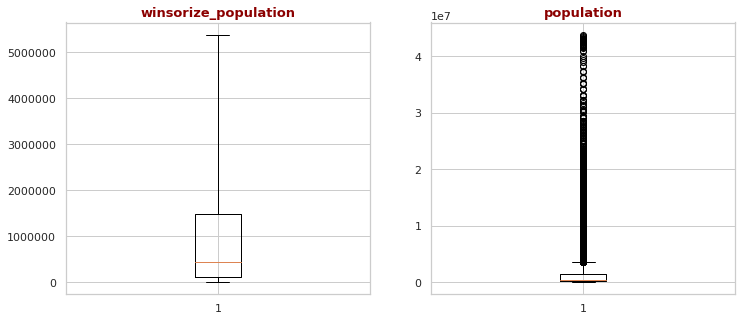

In [22]:
df["winsorize_population"]= winsorize(df["population"], (0,0.09))
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.boxplot(df["winsorize_population"], whis=3.0)
plt.title("winsorize_population", fontdict=title_font)

plt.subplot(122)
plt.boxplot(df["population"])
plt.title("population", fontdict=title_font)
plt.show()

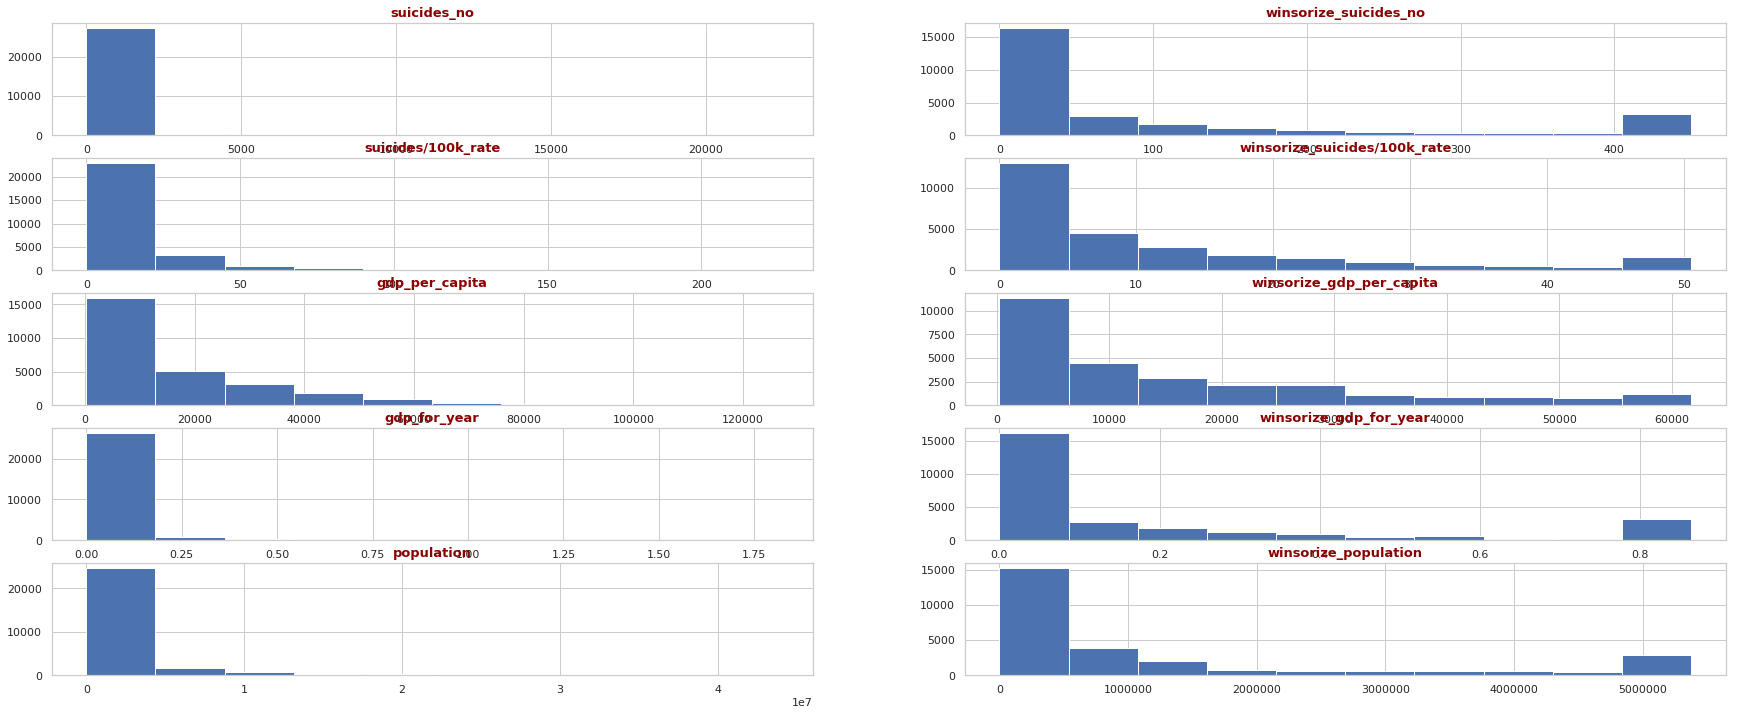

In [23]:
columns_name = ["suicides_no", "winsorize_suicides_no", "suicides/100k_rate", 
                "winsorize_suicides/100k_rate",  "gdp_per_capita",
                "winsorize_gdp_per_capita","gdp_for_year", "winsorize_gdp_for_year", "population", "winsorize_population" ]
plt.figure(figsize=(30,12))
for i in range(2):
    plt.subplot(5,2,i+1)
    plt.hist(df[columns_name[i]])
    plt.title(columns_name[i], fontdict=title_font)
for i in range(2):
    plt.subplot(5,2,i+3)
    plt.hist(df[columns_name[i+2]])
    plt.title(columns_name[i+2], fontdict=title_font)
for i in range(2):
    plt.subplot(5,2,i+5)
    plt.hist(df[columns_name[i+4]])
    plt.title(columns_name[i+4], fontdict=title_font)
for i in range(2):
    plt.subplot(5,2,i+7)
    plt.hist(df[columns_name[i+6]])
    plt.title(columns_name[i+6], fontdict=title_font)
for i in range(2):
    plt.subplot(5,2,i+9)
    plt.hist(df[columns_name[i+8]])
    plt.title(columns_name[i+8], fontdict=title_font)

plt.show()  
        
    

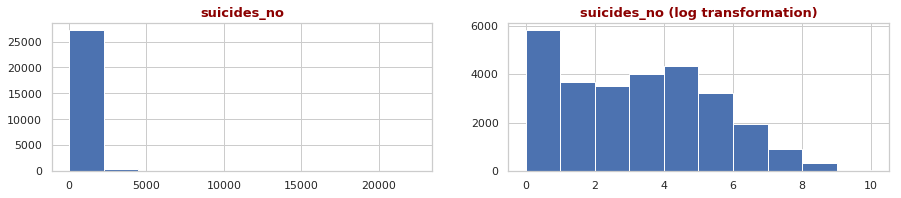

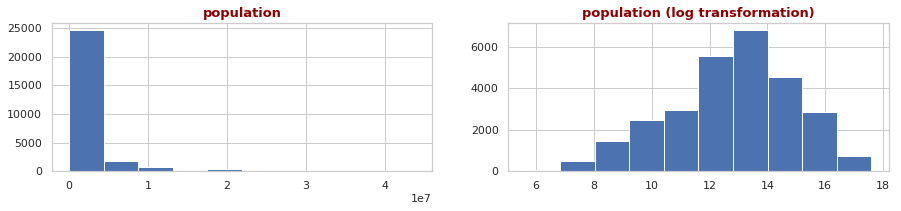

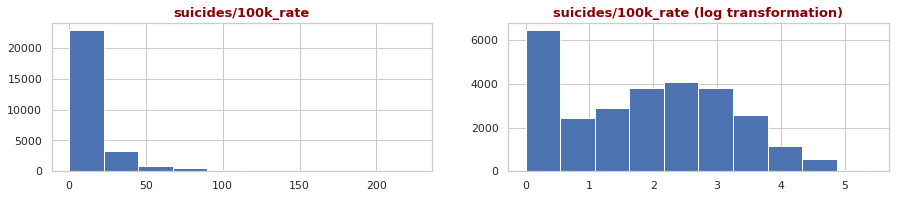

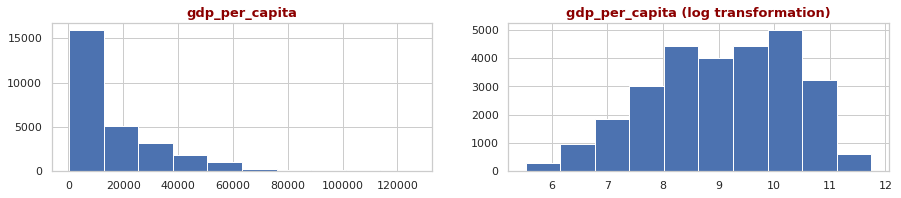

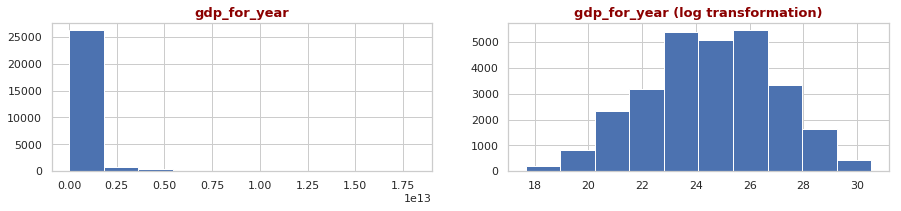

In [24]:
columns_name= ["suicides_no", "population", "suicides/100k_rate",
               "gdp_per_capita", "gdp_for_year"]
for name in columns_name:
    plt.figure(figsize=(15,6))
    plt.subplot(2,2,1)
    plt.hist(df[name])
    plt.title(name, fontdict=title_font)
        
    plt.subplot(2,2,2)
    plt.hist(np.log(df[name]+1))
    plt.title(name+ " (log transformation)", fontdict=title_font)
    plt.show()
    
        

In [26]:
df1 = pd.DataFrame(df.groupby("country").mean()["winsorize_gdp_per_capita"])
df2= pd.DataFrame(df.groupby("country").mean()["winsorize_suicides/100k_rate"])
df1["winsorize_suicides/100k_rate"]= df2["winsorize_suicides/100k_rate"]
df1.head()

,winsorize_gdp_per_capita,winsorize_suicides/100k_rate
country,,
Albania,1859.045455,3.502879
Antigua and Barbuda,10448.185185,0.552901
Argentina,7914.096774,10.371290
Armenia,1873.919463,3.275872
Aruba,24221.642857,7.208452


We will categorize the economic situation as very low, low, medium, high and very high.

In [27]:
def economy_convert(value):
    if value<5000:
        return "very low"
    elif value<10000:
        return "low"
    elif value<20000:
        return "medium"
    elif value<30000:
        return "high"
    else:
        return "very high"


In [28]:
df1["category"]= df1.winsorize_gdp_per_capita.apply(economy_convert)
df1

,winsorize_gdp_per_capita,winsorize_suicides/100k_rate,category
country,,,
Albania,1859.045455,3.502879,very low
Antigua and Barbuda,10448.185185,0.552901,medium
Argentina,7914.096774,10.371290,low
Armenia,1873.919463,3.275872,very low
Aruba,24221.642857,7.208452,high
...,...,...,...
United Arab Emirates,42162.000000,1.317917,very high
United Kingdom,31908.354839,7.502473,very high
United States,39269.612903,13.699677,very high


In [29]:
df1.groupby("category").mean()["winsorize_suicides/100k_rate"]

category
high         6.103520
low         11.553522
medium      10.561052
very high   13.238113
very low     9.919247
Name: winsorize_suicides/100k_rate, dtype: float64

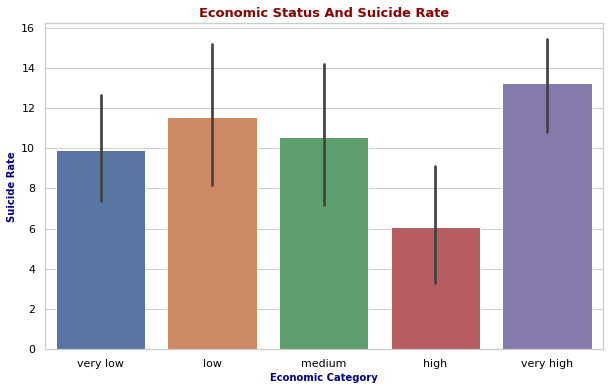

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(df1["category"], df1["winsorize_suicides/100k_rate"], order= ["very low", "low", "medium", "high", "very high"])
plt.title("Economic Status And Suicide Rate", fontdict=title_font)
plt.xlabel("Economic Category", fontdict=label_font)
plt.ylabel("Suicide Rate", fontdict=label_font)
plt.xticks(color= "black")
plt.yticks(color= "black")
plt.show()


In [31]:
kategoriler = df1["category"].unique()
pd.options.display.float_format= "{:.6f}".format
karsilastirma = pd.DataFrame(columns= ["category_1", "category_2", "statistics", "p_value"])
for i in range(0,len(kategoriler)):
    for j in range(i+1, len(kategoriler)):
        ttest= stats.ttest_ind(df1[df1["category"]==kategoriler[i]]["winsorize_suicides/100k_rate"],
                               df1[df1["category"]==kategoriler[j]]["winsorize_suicides/100k_rate"])
        category_1 = kategoriler[i]
        category_2 = kategoriler[j]
        statistics = ttest[0]
        p_value = ttest[1]
        karsilastirma = karsilastirma.append({"category_1": category_1, "category_2": category_2,
                                              "statistics": statistics, "p_value": p_value}, ignore_index=True)
        
display(karsilastirma)   

,category_1,category_2,statistics,p_value
0,very low,medium,-0.283071,0.778365
1,very low,low,-0.726901,0.470547
2,very low,high,1.461378,0.151724
3,very low,very high,-1.784132,0.080127
4,medium,low,-0.355442,0.724392
5,medium,high,1.596163,0.124102
6,medium,very high,-1.251571,0.218798
7,low,high,1.704722,0.099320
8,low,very high,-0.737971,0.464735
9,high,very high,-3.329255,0.002380


In [32]:
df1 = pd.DataFrame(df.groupby("age").sum()["winsorize_suicides_no"]).reset_index()
df1.groupby("age").sum()["winsorize_suicides_no"]
df1

,age,winsorize_suicides_no
0,15-24 years,474877
1,25-34 years,531229
2,35-54 years,769786
3,5-14 years,52264
4,55-74 years,648305
5,75+ years,379163


In [33]:
orderlist= ["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"]

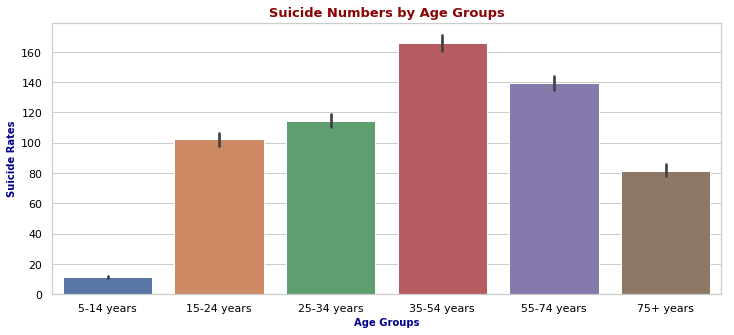

In [34]:
plt.figure(figsize=(12,5))
sns.barplot(df["age"], df["winsorize_suicides_no"], order=orderlist)
plt.title("Suicide Numbers by Age Groups", fontdict=title_font)
plt.xlabel("Age Groups", fontdict=label_font)
plt.ylabel("Suicide Rates",  fontdict=label_font)
plt.xticks(color= "black")
plt.yticks(color= "black")
plt.show()  

In [35]:
yaslar = df1["age"].unique()
karsilastirma = pd.DataFrame(columns= ["group_1", "group_2", "statistics", "p_value"])
pd.options.display.float_format= "{:.6f}".format
for i in range(0,len(yaslar)):
    for j in range(i+1,len(yaslar)):
        ttest = stats.ttest_ind(df[df["age"]==yaslar[i]]["winsorize_suicides_no"],
                                df[df["age"]==yaslar[j]]["winsorize_suicides_no"])
        group_1 = yaslar[i]
        group_2 = yaslar[j]
        statistics = ttest[0]
        p_value = ttest[1]
        karsilastirma = karsilastirma.append({"group_1": group_1, "group_2": group_2,
                                              "statistics": statistics, "p_value": p_value}, ignore_index=True)
display(karsilastirma)

,group_1,group_2,statistics,p_value
0,15-24 years,25-34 years,-3.946522,0.000080
1,15-24 years,35-54 years,-19.024309,0.000000
2,15-24 years,5-14 years,41.877939,0.000000
3,15-24 years,55-74 years,-11.616821,0.000000
4,15-24 years,75+ years,7.196000,0.000000
5,25-34 years,35-54 years,-15.055483,0.000000
6,25-34 years,5-14 years,45.121686,0.000000
7,25-34 years,55-74 years,-7.659328,0.000000
8,25-34 years,75+ years,11.099879,0.000000
9,35-54 years,5-14 years,58.717493,0.000000


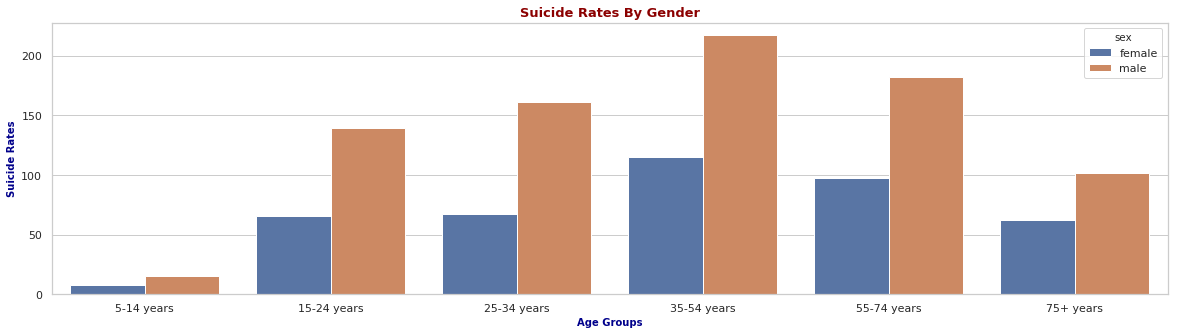

In [36]:
df1= df.groupby(["sex", "age"]).mean()["winsorize_suicides_no"].reset_index()


plt.figure(figsize=(20,5))
sns.barplot(data=df1, x= df1["age"], y=df1["winsorize_suicides_no"], hue=df1["sex"], order=orderlist)
plt.title("Suicide Rates By Gender", fontdict=title_font)
plt.xlabel("Age Groups", fontdict=label_font)
plt.ylabel("Suicide Rates", fontdict=label_font)

plt.show()  


In [37]:
df1 = pd.DataFrame()
df1["year"]= df["year"].astype("object")
df1["sex"]= df["sex"]
df1["winsorize_suicides/100k_rate"]= df["winsorize_suicides/100k_rate"]
df1.head()

,year,sex,winsorize_suicides/100k_rate
0,1987,male,6.710000
1,1987,male,5.190000
2,1987,female,4.830000
3,1987,male,4.590000
4,1987,male,3.280000


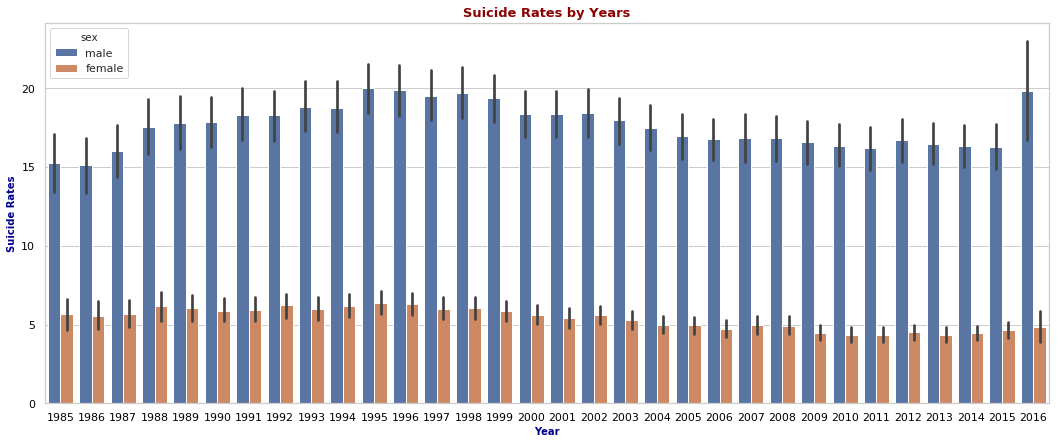

In [38]:
plt.figure(figsize=(18,7))
sns.barplot(data=df1, x="year", y="winsorize_suicides/100k_rate", hue="sex")
plt.title("Suicide Rates by Years", fontdict=title_font)
plt.xlabel("Year", fontdict=label_font)
plt.ylabel("Suicide Rates", fontdict=label_font)
plt.xticks(color= "black")
plt.yticks(color= "black")
plt.show() 

In [39]:
yıllar = df["year"].unique()
karsilastirma = pd.DataFrame(columns= ["grup_1", "grup_2", "istatistik", "p_degeri"])
pd.options.display.float_format= "{:.6f}".format
for i in range(0,len(yıllar)):
    for j in range(i+1,len(yıllar)):
        ttest= stats.ttest_ind(df[df["year"]==yıllar[i]]["winsorize_suicides/100k_rate"],
                               df[df["year"]==yıllar[j]]["winsorize_suicides/100k_rate"])
        grup_1= yıllar[i]
        grup_2= yıllar[j]
        istatistik= ttest[0]
        p_degeri= ttest[1]
        karsilastirma= karsilastirma.append({"grup_1": grup_1, "grup_2": grup_2,
                                            "istatistik": istatistik, "p_degeri": p_degeri}, ignore_index=True)
display(karsilastirma[karsilastirma["p_degeri"]<0.005])

,grup_1,grup_2,istatistik,p_degeri
5,1987.000000,1995.000000,-3.162337,0.001595
6,1987.000000,1996.000000,-3.056843,0.002275
107,1992.000000,2010.000000,2.968879,0.003028
113,1992.000000,2013.000000,2.851277,0.004406
114,1992.000000,2014.000000,2.863393,0.004242
...,...,...,...,...
283,1999.000000,2015.000000,3.217306,0.001318
284,1999.000000,2011.000000,3.830717,0.000132
304,2000.000000,2011.000000,2.869101,0.004158
341,2002.000000,2011.000000,2.889524,0.003899


In [40]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k_rate,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation,winsorize_suicides_no,winsorize_suicides/100k_rate,winsorize_gdp_per_capita,winsorize_gdp_for_year,winsorize_population
0,Albania,1987,male,15-24 years,21,312900,6.710000,Albania1987,nan,2156624900,796,Generation X,21,6.710000,796,2156624900,312900
1,Albania,1987,male,35-54 years,16,308000,5.190000,Albania1987,nan,2156624900,796,Silent,16,5.190000,796,2156624900,308000
2,Albania,1987,female,15-24 years,14,289700,4.830000,Albania1987,nan,2156624900,796,Generation X,14,4.830000,796,2156624900,289700
3,Albania,1987,male,75+ years,1,21800,4.590000,Albania1987,nan,2156624900,796,G.I. Generation,1,4.590000,796,2156624900,21800
4,Albania,1987,male,25-34 years,9,274300,3.280000,Albania1987,nan,2156624900,796,Boomers,9,3.280000,796,2156624900,274300


In [41]:
df.dropna()
df1 = pd.DataFrame(df.groupby("country").mean()["HDI_for_year"])
df1["winsorize_suicides/100k_rate"]= df.groupby("country").mean()["winsorize_suicides/100k_rate"]
df1 = df1.dropna()
df1.head()

,HDI_for_year,winsorize_suicides/100k_rate
country,,
Albania,0.673000,3.502879
Antigua and Barbuda,0.781667,0.552901
Argentina,0.779600,10.371290
Armenia,0.690125,3.275872
Australia,0.912750,12.992806


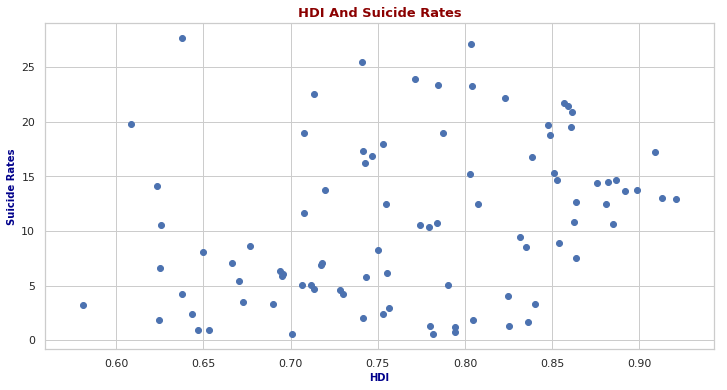

In [42]:
plt.figure(figsize=(12,6))
plt.scatter(df1["HDI_for_year"], df1["winsorize_suicides/100k_rate"])
plt.title("HDI And Suicide Rates", fontdict=title_font)
plt.xlabel("HDI", fontdict=label_font)
plt.ylabel("Suicide Rates", fontdict=label_font)
plt.show()  

In [43]:
df1.corr() 

,HDI_for_year,winsorize_suicides/100k_rate
HDI_for_year,1.000000,0.300291
winsorize_suicides/100k_rate,0.300291,1.000000


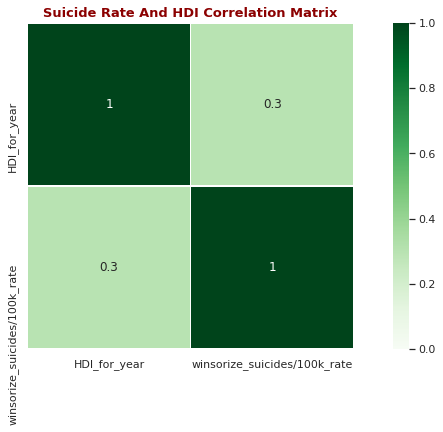

In [44]:
korelasyon_matrisi_df1= df1.corr()
plt.figure(figsize=(14,6))
sns.heatmap(korelasyon_matrisi_df1, square=True, annot=True, linewidth=.5, vmin=0, vmax=1, cmap="Greens")
plt.title("Suicide Rate And HDI Correlation Matrix", fontdict=title_font)
plt.show()

### 6- Results

This study has examined what might be the possible features that affect suicide rates.
- According to the results of the analysis we didn't see a significant relationship between suicide rates and economic situation, although both high-income and low-income countries have higher suicide rates than middle-income countries.
-  Suicide rates are highest where the age range is 35-54 age range.
- Suicide rates were significantly higher in men than in women, which remain quite consistent over the years.
- No big correlation can be found between HDI and sucide rates.

Many features have an impact on suicide rates of countries. For example geographical features, people's religious beliefs, prevalence rates of substance use, sexual and physical abuse rates are effect the suicide rates. That's why  we didn't see the impact on suicide rates of the economic situation and HDI.